تحميل البيانات

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")




عرض أول 5 صفوف لفهم هيكل البيانات

In [5]:
print(df.head())

           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland


تحويل عمود التاريخ إلى نوع datetime

In [6]:
df["dt"] = pd.to_datetime(df["dt"])

 التحقق من القيم المفقودة في كل عمود

In [7]:
missing_values = df.isnull().sum()
print("عدد القيم المفقودة قبل المعالجة:\n", missing_values)

عدد القيم المفقودة قبل المعالجة:
 dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64


 حساب نسبة القيم المفقودة

In [8]:
missing_percentage = (missing_values / len(df)) * 100
print("نسبة القيم المفقودة:\n", missing_percentage)

نسبة القيم المفقودة:
 dt                               0.000000
AverageTemperature               5.654225
AverageTemperatureUncertainty    5.526251
Country                          0.000000
dtype: float64


معالجة القيم المفقودة عبر تعبئتها بمتوسط القيم لكل بلد

In [9]:
df["AverageTemperature"] = df.groupby("Country")["AverageTemperature"].transform(lambda x: x.fillna(x.mean()))
df["AverageTemperatureUncertainty"] = df.groupby("Country")["AverageTemperatureUncertainty"].transform(lambda x: x.fillna(x.mean()))

حذف الصفوف المتبقية التي لا يمكن تعبئتها

In [10]:
df.dropna(inplace=True)

إعادة التحقق من القيم المفقودة بعد المعالجة

In [11]:
print("عدد القيم المفقودة بعد المعالجة:\n", df.isnull().sum())

عدد القيم المفقودة بعد المعالجة:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64


تحليل القيم الشاذة باستخدام Boxplot

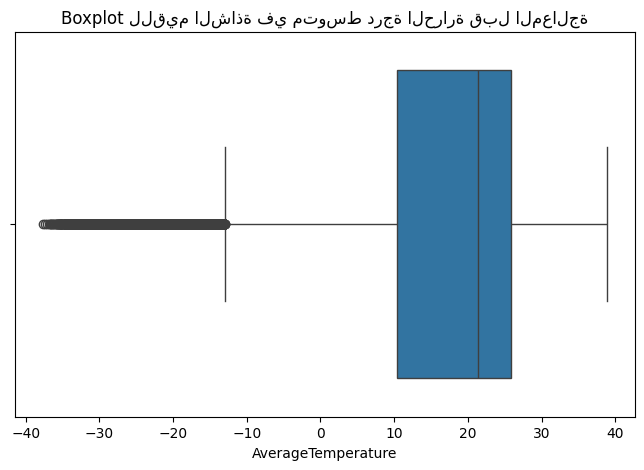

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["AverageTemperature"])
plt.title("Boxplot للقيم الشاذة في متوسط درجة الحرارة قبل المعالجة")
plt.show()

 اكتشاف القيم الشاذة باستخدام IQR

In [13]:
Q1 = df["AverageTemperature"].quantile(0.25)
Q3 = df["AverageTemperature"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

استبدال القيم الشاذة بالمعدل الوسيط لكل بلد

In [14]:
median_temp_by_country = df.groupby("Country")["AverageTemperature"].median()
df.loc[(df["AverageTemperature"] < lower_bound) | (df["AverageTemperature"] > upper_bound), 
       "AverageTemperature"] = df["Country"].map(median_temp_by_country)

إعادة رسم Boxplot بعد المعالجة

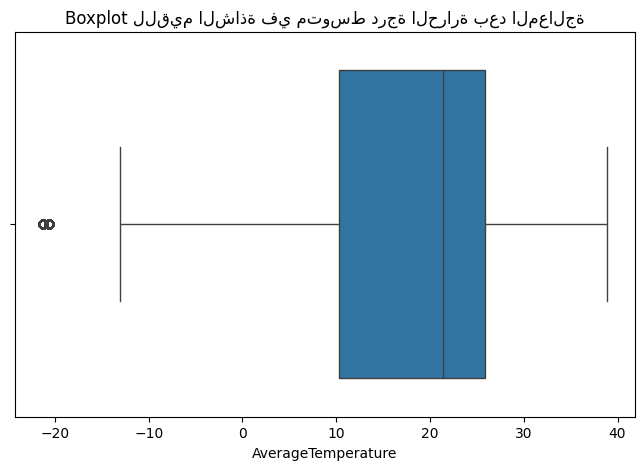

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["AverageTemperature"])
plt.title("Boxplot للقيم الشاذة في متوسط درجة الحرارة بعد المعالجة")
plt.show()

حفظ الملف بعد المعالجة

In [16]:
# حفظ البيانات المعالجة في ملف CSV جديد
df.to_csv("cleaned_data.csv", index=False, encoding="utf-8")